In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)


In [2]:
df = pd.read_excel("data/1-s2.0-S2352340921003619-mmc1.xlsx", index_col=None)
df.head(5)

,Totalchildreneverborn,Urban,Region,Pregnant,Religion,Ageofhouseholdhead,Ageatfirstmarriage,Pregnancyterminated,Ageatfirstbirth,Currentlyworking,Womanoccupation,Fertilitypreferences,Childdesire,Kidsex,Kidalive,Kidtwin,Education,PERWEIGHT
0,9,2,1,0,2.0,50.0,22.0,2.0,23,10.0,10.0,2.0,2.0,1,1,1,1,1.685054
1,4,2,1,0,2.0,60.0,30.0,2.0,35,10.0,10.0,1.0,1.0,1,0,1,1,1.685054
2,6,2,1,1,2.0,40.0,19.0,1.0,20,10.0,10.0,1.0,1.0,2,1,1,1,1.685054
3,3,2,1,0,2.0,30.0,18.0,1.0,19,10.0,10.0,1.0,1.0,2,1,1,1,1.685054
4,3,2,1,0,2.0,30.0,18.0,1.0,19,10.0,10.0,1.0,1.0,1,1,1,1,1.685054


In [3]:
df.rename(columns={"Totalchildreneverborn":"Cheb", 
                   "Ageofhouseholdhead":"Hhha","Ageatfirstmarriage":"Age1stmar", 
                   "Pregnancyterminated":"Pregterm","Ageatfirstbirth":"Age1stbirth",
                   "Currentlyworking":"Curwor","Womanoccupation":"Woc",
                   "Fertilitypreferences":"Fp", "PERWEIGHT":"Perweight"}, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31482 entries, 0 to 31481
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cheb         31482 non-null  int64  
 1   Urban        31482 non-null  int64  
 2   Region       31482 non-null  int64  
 3   Pregnant     31482 non-null  int64  
 4   Religion     31322 non-null  float64
 5   Hhha         31424 non-null  float64
 6   Age1stmar    30878 non-null  float64
 7   Pregterm     31458 non-null  float64
 8   Age1stbirth  31482 non-null  int64  
 9   Curwor       31346 non-null  float64
 10  Woc          31328 non-null  float64
 11  Fp           31311 non-null  float64
 12  Childdesire  31155 non-null  float64
 13  Kidsex       31482 non-null  int64  
 14  Kidalive     31482 non-null  int64  
 15  Kidtwin      31482 non-null  int64  
 16  Education    31482 non-null  int64  
 17  Perweight    31482 non-null  float64
dtypes: float64(9), int64(9)
memory usage: 4.3 MB


In [5]:
# Gán lại giá trị ban đầu cho các biến
df.replace({"Urban":{1:"Urban", 
                     2:"Rural"},
           "Region":{1:"North Central", 
                     2:"North East", 
                     3:"North West", 
                     4:"South East", 
                     5:"South South", 
                     6:"South West"},
           "Pregnant":{0:"No",
                       1:"Yes"},
           "Religion":{1:"Muslim/Islam", 
                       2:"Christian/Others"},
           "Pregterm":{1:"No", 
                       2:"Yes"},
           "Curwor":{0:"No", 
                     10:"Yes"},
           "Woc":{0:"Not currently working", 
                  10:"Sales worker", 
                  22:"Professional worker/Others"},
           "Fp":{1:"Have another", 
                 2:"No more/Others"},
           "Childdesire":{1:"Wanted then", 
                          2:"Wanted later/No more"},
           "Kidsex":{1:"Female", 
                     2:"Male"},
           "Kidalive":{0:"No", 
                       1:"Yes"},
           "Kidtwin":{1:"Single birth", 
                      2:"Multiple birth"},
           "Education":{0:"No education", 
                        1:"Primary", 
                        2:"Secondary/Higher"}},
          inplace=True)


In [6]:
# Ép kiểu dữ liệu về catergory tương tự như factor trong R
cols = ['Urban', 'Region', 'Pregnant', 'Religion',
       'Pregterm', 'Curwor', 'Woc', 'Fp', 'Childdesire',
       'Kidsex', 'Kidalive', 'Kidtwin', 'Education']
df[cols] = df[cols].astype("category")

Text(0, 0.5, 'Frequency')

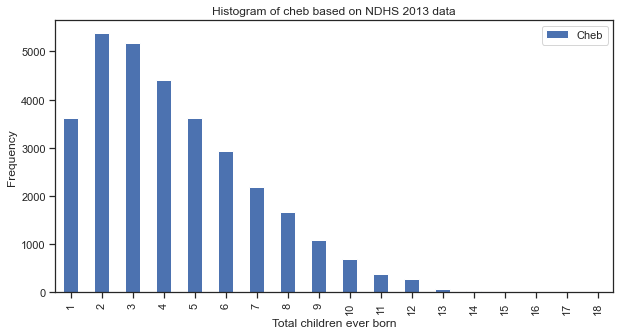

In [7]:
frequency = pd.DataFrame(df.Cheb.value_counts())
frequency.sort_index(inplace=True)
ax = frequency.plot(kind='bar', title='Histogram of cheb based on NDHS 2013 data', figsize=(10, 5))
ax.set_xlabel("Total children ever born")
ax.set_ylabel("Frequency")

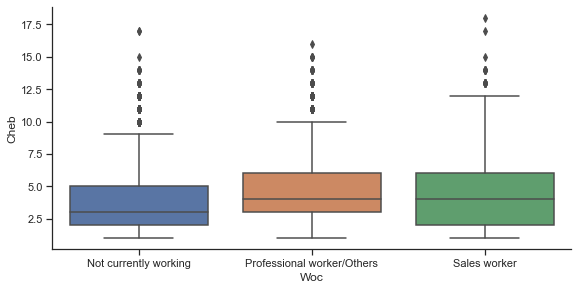

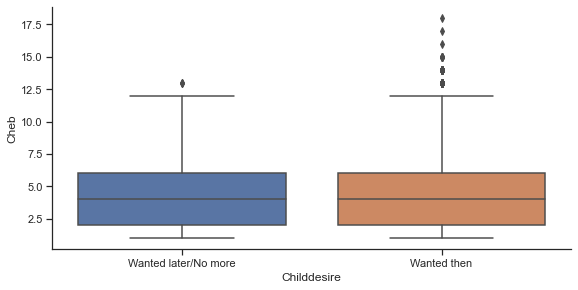

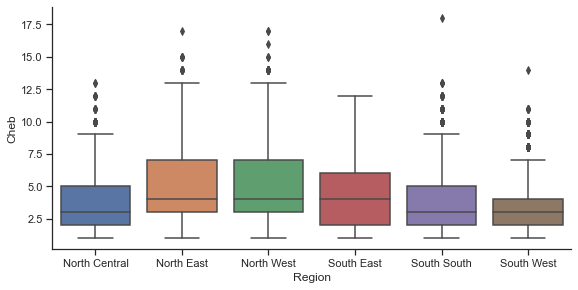

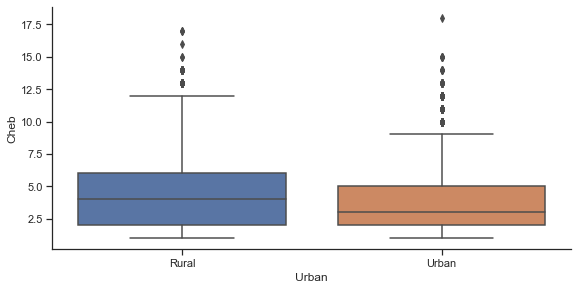

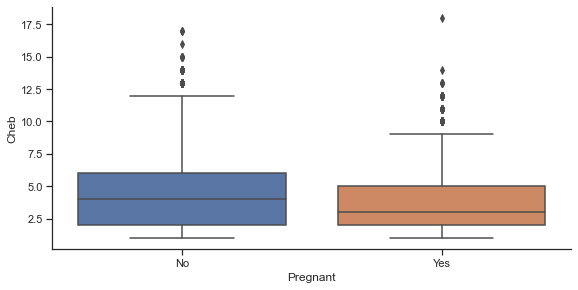

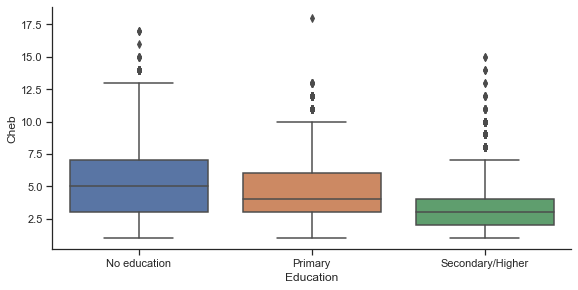

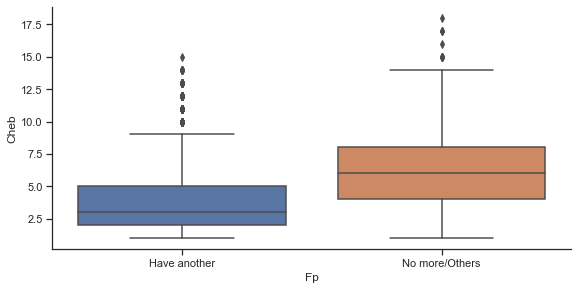

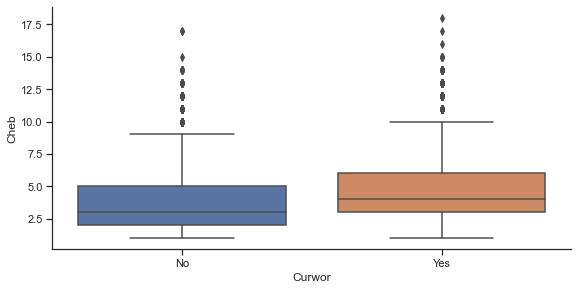

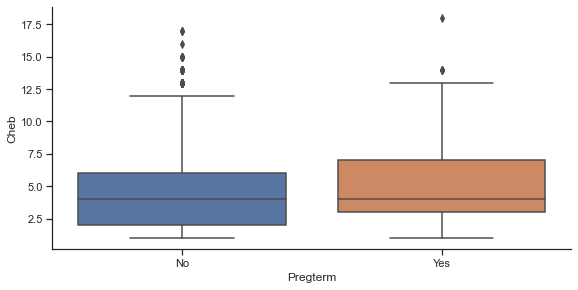

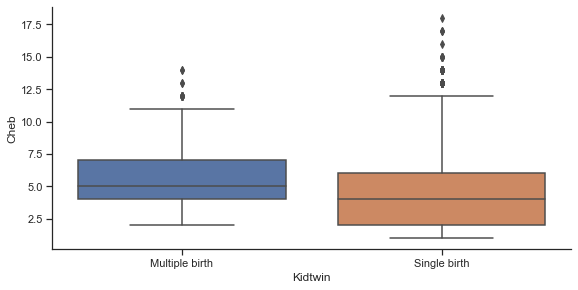

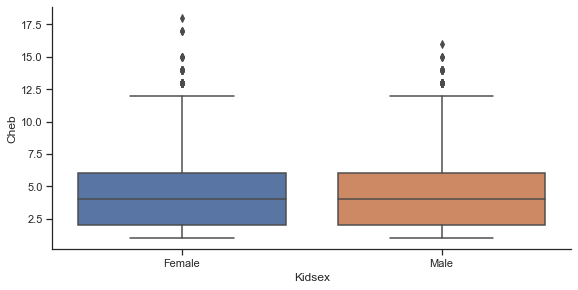

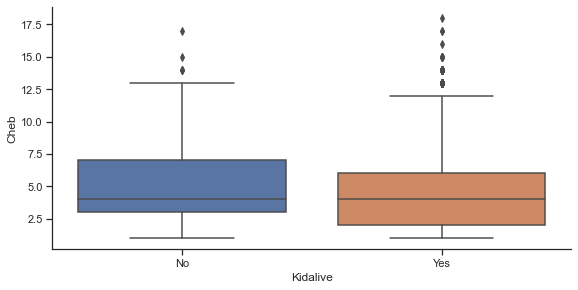

In [9]:
sns.catplot(data=df, kind="box", x='Woc', y='Cheb', height=4, aspect=2)
sns.catplot(data=df, kind="box", x='Childdesire', y='Cheb', height=4, aspect=2)
sns.catplot(data=df, kind="box", x='Region', y='Cheb', height=4, aspect=2)
sns.catplot(data=df, kind="box", x='Urban', y='Cheb', height=4, aspect=2)
sns.catplot(data=df, kind="box", x='Pregnant', y='Cheb', height=4, aspect=2)
sns.catplot(data=df,kind="box", x='Education', y='Cheb', height=4, aspect=2)
sns.catplot(data=df, kind="box", x='Fp', y='Cheb', height=4, aspect=2)
sns.catplot(data=df, kind="box", x='Curwor', y='Cheb', height=4, aspect=2)
sns.catplot(data=df, kind="box", x='Pregterm', y='Cheb', height=4, aspect=2)
sns.catplot(data=df, kind="box", x='Kidtwin', y='Cheb', height=4, aspect=2)
sns.catplot(data=df,kind="box", x='Kidsex', y='Cheb', height=4, aspect=2)
sns.catplot(data=df,kind="box", x='Kidalive', y='Cheb', height=4, aspect=2)

In [10]:
df.columns

Index(['Cheb', 'Urban', 'Region', 'Pregnant', 'Religion', 'Hhha', 'Age1stmar',
       'Pregterm', 'Age1stbirth', 'Curwor', 'Woc', 'Fp', 'Childdesire',
       'Kidsex', 'Kidalive', 'Kidtwin', 'Education', 'Perweight'],
      dtype='object')

In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [12]:
fml = 'Cheb ~ Urban + Region + Religion + Hhha + Age1stmar + Pregterm + Age1stbirth + Curwor + Woc + Fp + Childdesire + Kidsex + Kidalive + Kidtwin + Education + Perweight'

model = smf.glm(formula = fml, data=df, family=sm.families.Poisson())
result = model.fit()
result

In [13]:
print(result.deviance)
print(result.pearson_chi2)
print(result.llf)
print(result.df_resid)
print(result.aic)

27409.722712656225
26918.288435099814
-61341.68355026539
29874
122729.36710053078


In [14]:
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   Cheb   No. Observations:                29897
Model:                            GLM   Df Residuals:                    29874
Model Family:                 Poisson   Df Model:                           22
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -61342.
Date:                Fri, 09 Jul 2021   Deviance:                       27410.
Time:                        15:30:53   Pearson chi2:                 2.69e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc